In [2]:
import os
import time
import json, re

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, HTML, clear_output

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import arc_mdda

In [5]:
#data_train = arc_mdda.load_json_data('./ARC-Challenge/ARC-800-tasks/training/')
data_train = arc_mdda.load_json_data('./External/ARC-AGI/data/training/')
len(data_train), sorted(data_train.keys())[0::70]

(400, ['007bbfb7', '3345333e', '623ea044', '8d5021e8', 'b548a754', 'dc0a314f'])

### Basic visualisation

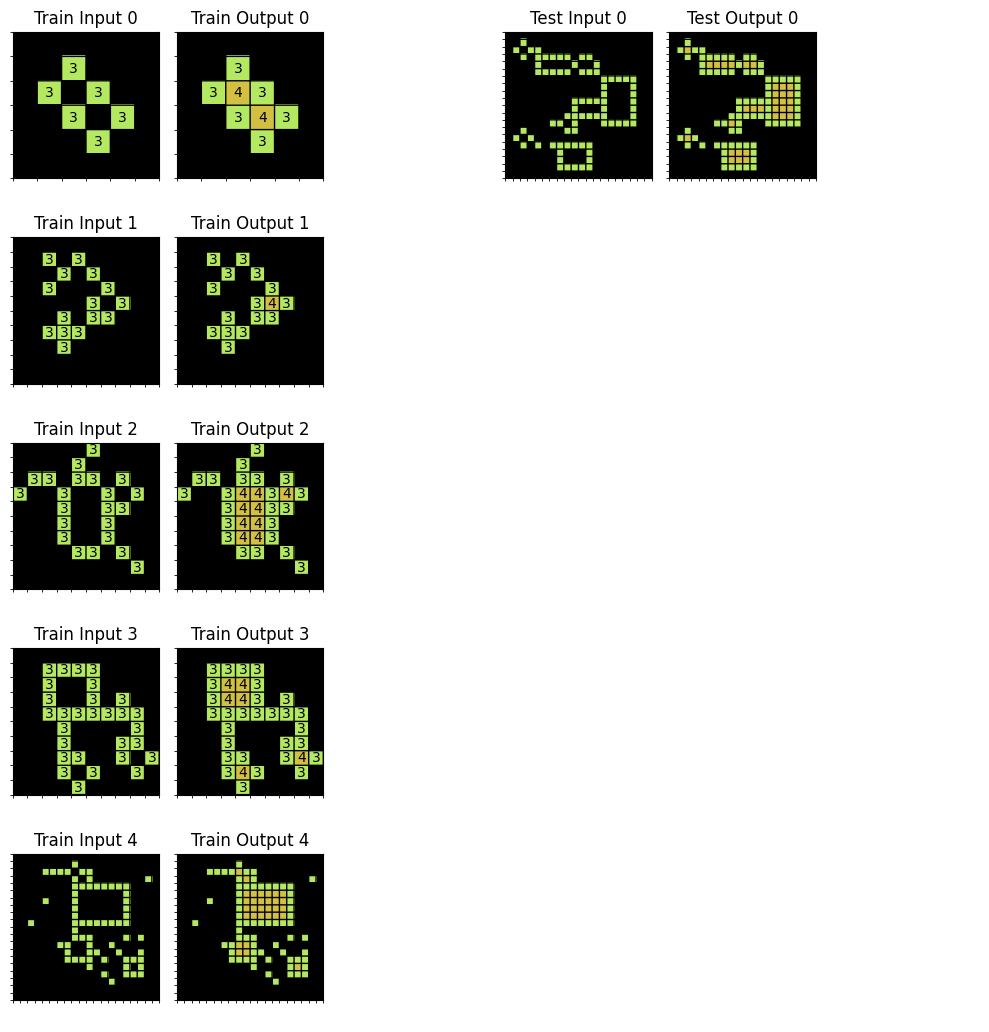

In [6]:
task_hash = '00d62c1b'  # 3345333e<< 00d62c1b 27a28665
task = data_train[task_hash]
#task;
arc_mdda.plot_2d_grid(task, plt);

In [7]:
sample_grid = arc_mdda.Grid( np.array( task['train'][0]['input'] ) )
print( sample_grid.to_txt_colours() ) 

{'rows': 6, 'cols': 6, 'offset_row': 0, 'offset_col': 0, 'grid': ' black black black black black black\n black black green black black black\n black green black green black black\n black black green black green black\n black black black green black black\n black black black black black black'}


In [8]:
#print( sample_grid.to_txt_colour_planes() )

In [9]:
new_grid = arc_mdda.Grid.empty() # background=1
print( new_grid.to_txt_colours() ) 

{'rows': 3, 'cols': 5, 'offset_row': 0, 'offset_col': 0, 'grid': ' black black black black black\n black black black black black\n black black black black black'}


In [10]:
print( new_grid.to_txt_colour_planes() )  # background=0

{'rows': 3, 'cols': 5, 'offset_row': 0, 'offset_col': 0, 'planes': [{'colour': ' black', 'grid': ' filled filled filled filled filled\n filled filled filled filled filled\n filled filled filled filled filled'}]}


In [11]:
from typing import NewType
Color = NewType('Color', int)

def foo(c: Color, d: int):
  return c+d

ONE: Color=1
print( foo(ONE, 2) )
print( foo(ONE, 34.2) )

3
35.2


In [12]:
def bar(d:int):
  return d*d
bar(3.23)

10.4329

### Find number of training examples with particular last digits
* Is the distribution ~even?

In [13]:
if False:
  digit_last_count=dict()
  for task_hash in data_train.keys():
    d=task_hash[-1]
    if d not in digit_last_count: digit_last_count[d]=0
    digit_last_count[d]+=1
  
  for k in sorted(digit_last_count.keys()):
    print(k,digit_last_count[k])
  # Seems somewhat balanced
# ### Find the distribution of sizes of problems

In [14]:
data_set=data_train # Could be data_eval...

In [15]:
def get_task_size(task, include_test=False): # Just thinking about the I/O grids...
  size_arr=[]
  task_arr = task['train'] 
  if include_test:
    task_arr = task_arr + task['test']
  for ex in task_arr:
    size  = len(ex['input']) * len(ex['input'][0])
    size += len(ex['output']) * len(ex['output'][0])
    size_arr.append(size)
  #print(size_arr)
  return sum(size_arr), max(size_arr)
  #size_total, size_max
get_task_size(data_set[task_hash])

(1472, 800)

In [16]:
size_all=[]
for task_hash in sorted(data_set.keys()):
  task_size = get_task_size(data_set[task_hash])
  size_all.append( task_size )

size_all = np.array(size_all, dtype=np.float32)

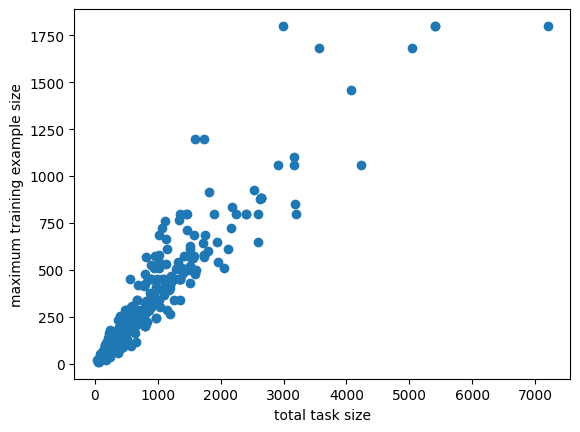

In [17]:
plt.scatter(size_all[:,0], size_all[:,1]);
plt.xlabel('total task size');
plt.ylabel('maximum training example size');

In [18]:
token_limit=2000 # Allows for all of the biggest tasks (just I/O though)
np.sum( size_all[:,0]<token_limit), np.sum( size_all[:,1]<token_limit), 
# Number with all task I/O < token_limit, Number with single biggest task I/O < token_limit

(np.int64(372), np.int64(400))